In [9]:
# ...existing code...
# Setup and imports for IGE Methods Comparison
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

# Add the comparison script to path
sys.path.append('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis')

from compare_ige_methods import (
    load_rdr_data, load_sempgs_data, load_pgs_regression_data,
    calculate_rdr_ige_proportions, calculate_sempgs_ige_proportions,
    calculate_fullpgs_ige_proportions, calculate_kong_ige_proportions,
    create_violin_plot
)

print("IGE Methods Comparison Setup Complete!")
print("Available methods: RDR, SEM-PGS (Direct & Total), Full PGS, Kong PGS")
# ...existing code...

IGE Methods Comparison Setup Complete!
Available methods: RDR, SEM-PGS (Direct & Total), Full PGS, Kong PGS


# Comprehensive IGE Methods Comparison Results

This notebook demonstrates the comparison of four different methods for estimating indirect genetic effects (IGE):

1. **RDR (Relatedness Disequilibrium Regression)**: Uses variance components from GCTA HE regression
2. **SEM-PGS (Structural Equation Modeling with PGS)**: 
   - Direct IGE: Observable genetic nurture effects (phi)
   - Total IGE: Observable + latent genetic nurture effects (phi + rho)
3. **Full PGS Regression**: Incremental R² from adding parental PGS to offspring PGS
4. **Kong's Haplotypic PGS**: R² from paternal non-transmitted alleles

Each method provides a different perspective on IGE estimation, and this comparison helps understand their relative performance across different simulation conditions.

## Updated Analysis: Direct IGE Only with Median Reporting

We've updated the analysis to focus on:
- **Direct IGE only**: SEM-PGS uses only phi (observed genetic nurture effects), no latent rho
- **Both RDR parameters**: VG2 (second parameter) and VG3 (third parameter) 
- **Median reporting**: Summary statistics now show median instead of mean
- **Comprehensive visualization**: Plots for all condition-trait combinations

In [10]:
# Reload the updated comparison functions with new changes
import importlib
import compare_ige_methods
importlib.reload(compare_ige_methods)

from compare_ige_methods import (
    load_rdr_data, load_sempgs_data, load_pgs_regression_data,
    calculate_rdr_ige_proportions, calculate_sempgs_ige_proportions,
    calculate_fullpgs_ige_proportions, calculate_kong_ige_proportions,
    create_violin_plot
)

print("Updated functions loaded successfully!")
print("Changes implemented:")
print("- RDR now returns both VG2 and VG3 parameters")
print("- SEM-PGS only returns direct IGE (phi values)")
print("- Violin plots show median instead of mean")
print("- Method names updated accordingly")

Updated functions loaded successfully!
Changes implemented:
- RDR now returns both VG2 and VG3 parameters
- SEM-PGS only returns direct IGE (phi values)
- Violin plots show median instead of mean
- Method names updated accordingly


In [11]:
# Define all conditions and traits to analyze
import numpy as np  # Add numpy import for this cell
import pandas as pd  # Add pandas import for this cell

conditions_analysis = [
    '05_t1pheVTnoAM_t2socVTnoAM_PGSall',
    '06_t1noVTpheAM_t2pheVTpheAM_PGSall', 
    '07_t1noVTsocAM_t2pheVTsocAM_PGSall',
    '08_t1noVTgenAM_t2pheVTgenAM_PGSall'
]

condition_names = {
    '05_t1pheVTnoAM_t2socVTnoAM_PGSall': 'Condition 5: T1 Pheno VT + T2 Social VT',
    '06_t1noVTpheAM_t2pheVTpheAM_PGSall': 'Condition 6: T1 Pheno AM only + T2 phe VT + phe AM',
    '07_t1noVTsocAM_t2pheVTsocAM_PGSall': 'Condition 7: T1 Social AM only + T2 phe VT + soc AM', 
    '08_t1noVTgenAM_t2pheVTgenAM_PGSall': 'Condition 8: T1 Genetic AM only + T2 phe VT + gen AM'
}

traits_analysis = [1, 2]

print("Analysis Configuration:")
print(f"Conditions: {len(conditions_analysis)}")
for cond in conditions_analysis:
    print(f"  - {condition_names[cond]}")
print(f"Traits: {traits_analysis}")
print(f"Total combinations: {len(conditions_analysis) * len(traits_analysis)}")

def analyze_ige_updated(condition, trait, verbose=False):
    """Updated function to analyze IGE methods with new parameters."""
    
    results = {}
    data_dict = {}
    
    # 1. Load RDR data (both VG2 and VG3)
    rdr_data = load_rdr_data(condition)
    if rdr_data is not None:
        rdr_vg2, rdr_vg3 = calculate_rdr_ige_proportions(rdr_data, trait)
        
        if rdr_vg2 is not None:
            results['RDR VG2'] = {
                'n': len(rdr_vg2),
                'median': np.median(rdr_vg2),
                'std': np.std(rdr_vg2)
            }
            data_dict['RDR VG2'] = rdr_vg2
            
        if rdr_vg3 is not None:
            results['RDR VG3'] = {
                'n': len(rdr_vg3),
                'median': np.median(rdr_vg3),
                'std': np.std(rdr_vg3)
            }
            data_dict['RDR VG3'] = rdr_vg3
    
    # 2. Load SEM-PGS data (direct IGE only)
    sempgs_data = load_sempgs_data(condition)
    if sempgs_data is not None:
        sempgs_direct = calculate_sempgs_ige_proportions(sempgs_data, trait)
        
        if sempgs_direct is not None:
            results['SEM-PGS Direct'] = {
                'n': len(sempgs_direct),
                'median': np.median(sempgs_direct),
                'std': np.std(sempgs_direct)
            }
            data_dict['SEM-PGS Direct'] = sempgs_direct
    
    # 3. Load Full PGS data
    fullpgs_data = load_pgs_regression_data(condition, trait, 'full_pgs')
    if fullpgs_data is not None:
        fullpgs_ige = calculate_fullpgs_ige_proportions(fullpgs_data, trait)
        
        if fullpgs_ige is not None:
            results['Full PGS'] = {
                'n': len(fullpgs_ige),
                'median': np.median(fullpgs_ige),
                'std': np.std(fullpgs_ige)
            }
            data_dict['Full PGS'] = fullpgs_ige
    
    # 4. Load Kong PGS data
    kong_data = load_pgs_regression_data(condition, trait, 'kong')
    if kong_data is not None:
        kong_ige = calculate_kong_ige_proportions(kong_data, trait)
        
        if kong_ige is not None:
            results['Kong PGS'] = {
                'n': len(kong_ige),
                'median': np.median(kong_ige),
                'std': np.std(kong_ige)
            }
            data_dict['Kong PGS'] = kong_ige
    
    if verbose:
        print(f"\nResults for {condition_names[condition]} - Trait {trait}:")
        for method, stats in results.items():
            print(f"  {method}: n={stats['n']}, median={stats['median']:.4f}, std={stats['std']:.4f}")
    
    return results, data_dict

print("\nAnalysis function ready!")

Analysis Configuration:
Conditions: 4
  - Condition 5: T1 Pheno VT + T2 Social VT
  - Condition 6: T1 Pheno AM only + T2 phe VT + phe AM
  - Condition 7: T1 Social AM only + T2 phe VT + soc AM
  - Condition 8: T1 Genetic AM only + T2 phe VT + gen AM
Traits: [1, 2]
Total combinations: 8

Analysis function ready!


## Condition 5: T1 Phenotypic VT + T2 Social VT (PGS All)

=== Condition 5: T1 Pheno VT + T2 Social VT - Trait 1 ===
SEM-PGS: Loaded 632 rows with 89 columns from individual file
Looking for columns: incremental_r2_PGSm1, incremental_r2_PGSp1
Available columns: ['filename', 'run_number', 'total_r2_PGSo1', 'total_r2_PGSp1', 'total_r2_PGSm1', 'incremental_r2_PGSo1', 'incremental_r2_PGSp1', 'incremental_r2_PGSm1', 'added_predictor_PGSo1', 'added_predictor_PGSp1', 'added_predictor_PGSm1', 'outcome_PGSo1', 'outcome_PGSp1', 'outcome_PGSm1', 'n_samples', 'n_predictors', 'outcome', 'regression_type']

Results for Condition 5: T1 Pheno VT + T2 Social VT - Trait 1:
  RDR VG2: n=1000, median=0.1399, std=0.0147
  RDR VG3: n=1000, median=0.3306, std=0.0141
  SEM-PGS Direct: n=632, median=0.0638, std=0.0107
  Full PGS: n=1000, median=0.0711, std=0.0027
  Kong PGS: n=1000, median=0.0700, std=0.0056


/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis/compare_ige_methods.py:253: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df_plot, x='Method', y='IGE_Proportion',


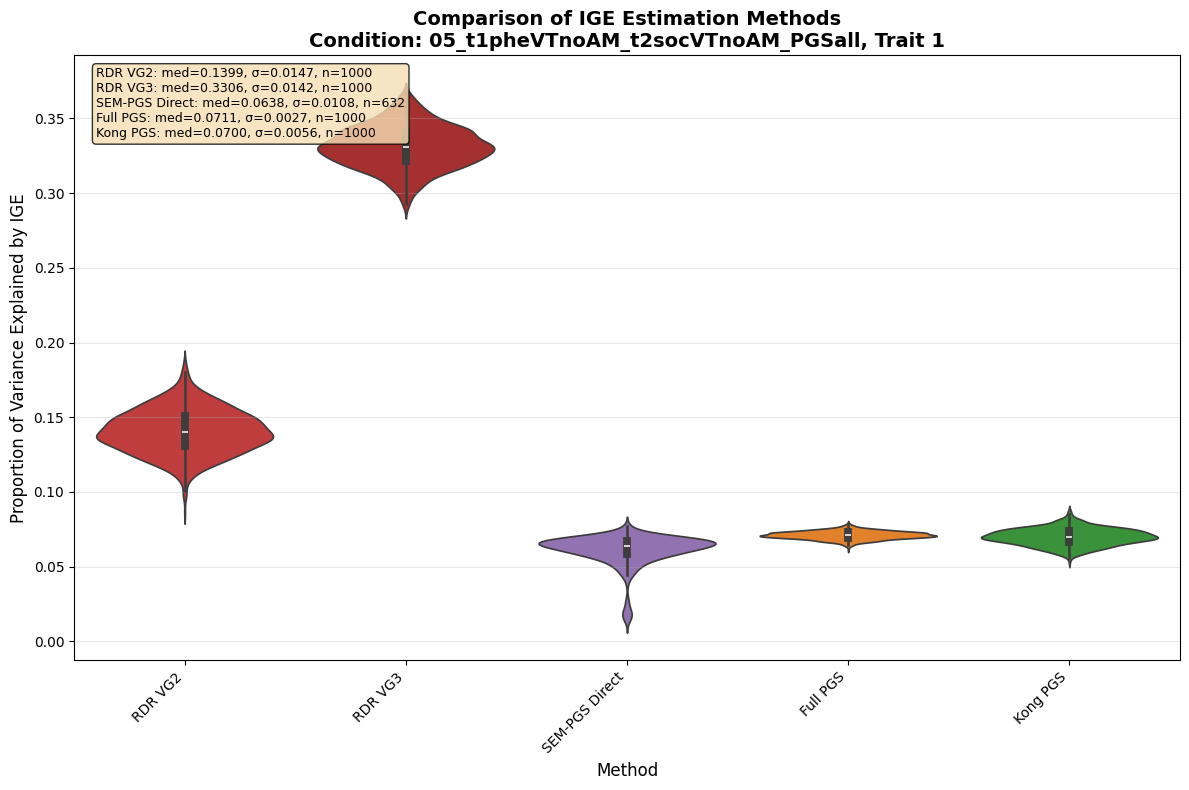

In [12]:
# Condition 5, Trait 1
condition = '05_t1pheVTnoAM_t2socVTnoAM_PGSall'
trait = 1

print(f"=== {condition_names[condition]} - Trait {trait} ===")
results, data_dict = analyze_ige_updated(condition, trait, verbose=True)

if data_dict:
    create_violin_plot(data_dict, condition, trait, save_path=None)
else:
    print("No data available for plotting")

=== Condition 5: T1 Pheno VT + T2 Social VT - Trait 2 ===
SEM-PGS: Loaded 632 rows with 89 columns from individual file
Looking for columns: incremental_r2_PGSm2, incremental_r2_PGSp2
Available columns: ['filename', 'run_number', 'total_r2_PGSo2', 'total_r2_PGSp2', 'total_r2_PGSm2', 'incremental_r2_PGSo2', 'incremental_r2_PGSp2', 'incremental_r2_PGSm2', 'added_predictor_PGSo2', 'added_predictor_PGSp2', 'added_predictor_PGSm2', 'outcome_PGSo2', 'outcome_PGSp2', 'outcome_PGSm2', 'n_samples', 'n_predictors', 'outcome', 'regression_type']

Results for Condition 5: T1 Pheno VT + T2 Social VT - Trait 2:
  RDR VG2: n=1000, median=0.0007, std=0.0087
  RDR VG3: n=1000, median=-0.0045, std=0.0206
  SEM-PGS Direct: n=632, median=0.0012, std=0.0088
  Full PGS: n=1000, median=0.0001, std=0.0001
  Kong PGS: n=1000, median=0.0002, std=0.0003


/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis/compare_ige_methods.py:253: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df_plot, x='Method', y='IGE_Proportion',


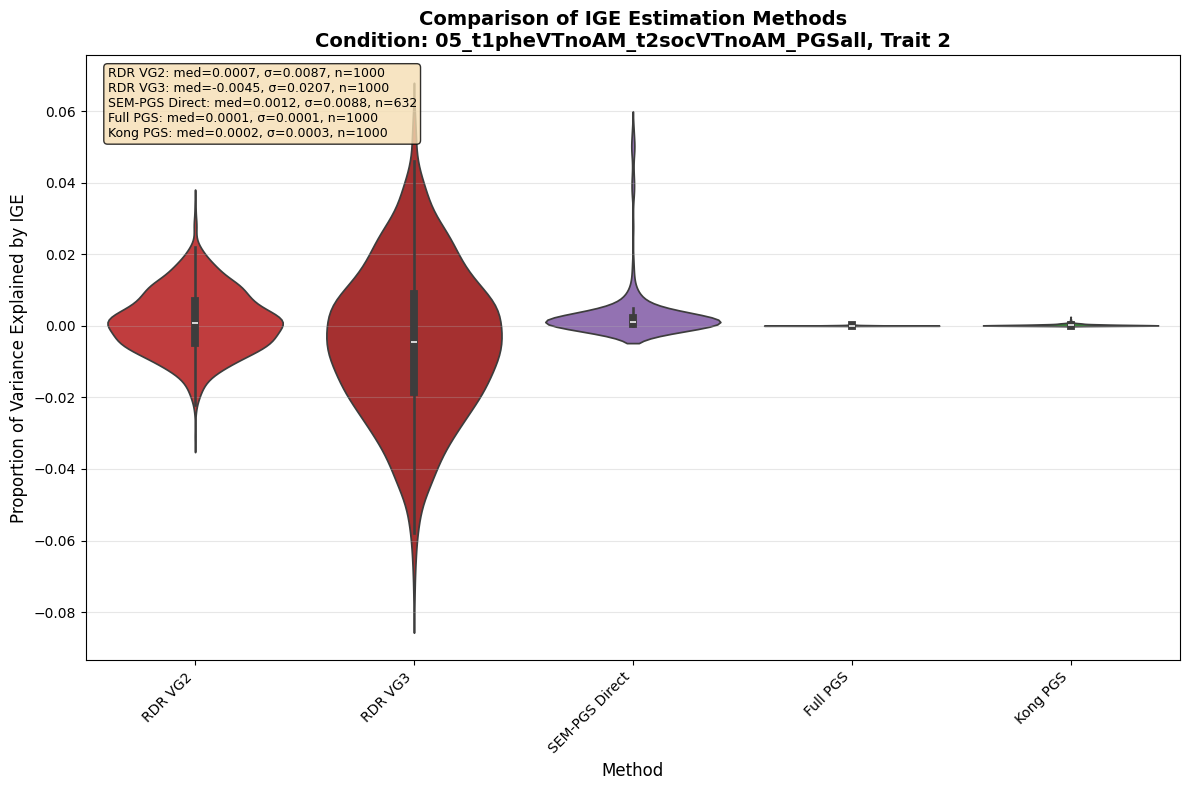

In [13]:
# Condition 5, Trait 2
condition = '05_t1pheVTnoAM_t2socVTnoAM_PGSall'
trait = 2

print(f"=== {condition_names[condition]} - Trait {trait} ===")
results, data_dict = analyze_ige_updated(condition, trait, verbose=True)

if data_dict:
    create_violin_plot(data_dict, condition, trait, save_path=None)
else:
    print("No data available for plotting")

## Condition 6: T1 Phenotypic AM Only (PGS All)

=== Condition 6: T1 Pheno AM only + T2 phe VT + phe AM - Trait 1 ===
SEM-PGS: Loaded 615 rows with 89 columns from individual file
Looking for columns: incremental_r2_PGSm1, incremental_r2_PGSp1
Available columns: ['filename', 'run_number', 'total_r2_PGSo1', 'total_r2_PGSp1', 'total_r2_PGSm1', 'incremental_r2_PGSo1', 'incremental_r2_PGSp1', 'incremental_r2_PGSm1', 'added_predictor_PGSo1', 'added_predictor_PGSp1', 'added_predictor_PGSm1', 'outcome_PGSo1', 'outcome_PGSp1', 'outcome_PGSm1', 'n_samples', 'n_predictors', 'outcome', 'regression_type']

Results for Condition 6: T1 Pheno AM only + T2 phe VT + phe AM - Trait 1:
  RDR VG2: n=1000, median=0.1342, std=0.0171
  RDR VG3: n=1000, median=0.4126, std=0.0218
  SEM-PGS Direct: n=615, median=0.0007, std=0.0003
  Full PGS: n=1000, median=0.0000, std=0.0000
  Kong PGS: n=1000, median=0.0522, std=0.0053


/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis/compare_ige_methods.py:253: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df_plot, x='Method', y='IGE_Proportion',


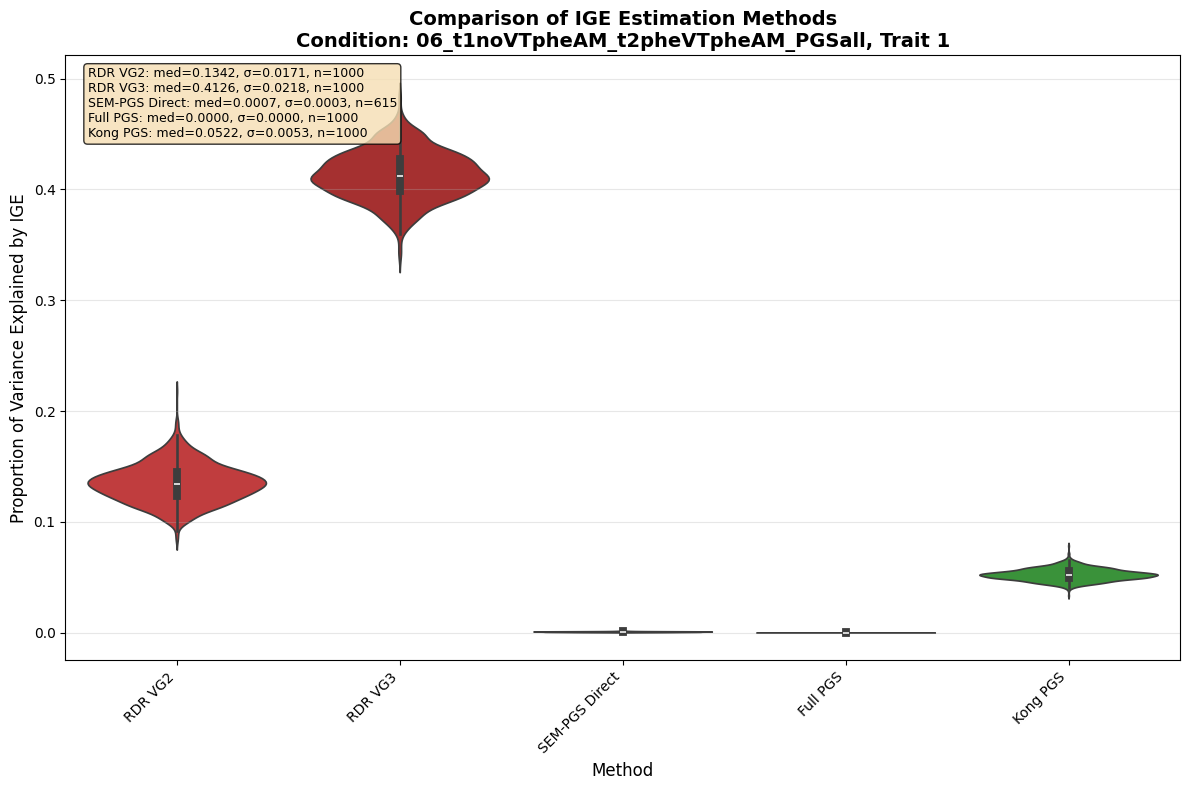

In [15]:
# Condition 6, Trait 1
condition = '06_t1noVTpheAM_t2pheVTpheAM_PGSall'
trait = 1

print(f"=== {condition_names[condition]} - Trait {trait} ===")
results, data_dict = analyze_ige_updated(condition, trait, verbose=True)

if data_dict:
    create_violin_plot(data_dict, condition, trait, save_path=None)
else:
    print("No data available for plotting")

=== Condition 6: T1 Pheno AM only + T2 phe VT + phe AM - Trait 2 ===
SEM-PGS: Loaded 615 rows with 89 columns from individual file
Looking for columns: incremental_r2_PGSm2, incremental_r2_PGSp2
Available columns: ['filename', 'run_number', 'total_r2_PGSo2', 'total_r2_PGSp2', 'total_r2_PGSm2', 'incremental_r2_PGSo2', 'incremental_r2_PGSp2', 'incremental_r2_PGSm2', 'added_predictor_PGSo2', 'added_predictor_PGSp2', 'added_predictor_PGSm2', 'outcome_PGSo2', 'outcome_PGSp2', 'outcome_PGSm2', 'n_samples', 'n_predictors', 'outcome', 'regression_type']

Results for Condition 6: T1 Pheno AM only + T2 phe VT + phe AM - Trait 2:
  RDR VG2: n=1000, median=0.6348, std=0.0289
  RDR VG3: n=1000, median=0.5475, std=0.0161
  SEM-PGS Direct: n=615, median=0.0388, std=0.0039
  Full PGS: n=1000, median=0.0760, std=0.0024
  Kong PGS: n=1000, median=0.2423, std=0.0085


/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis/compare_ige_methods.py:253: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df_plot, x='Method', y='IGE_Proportion',


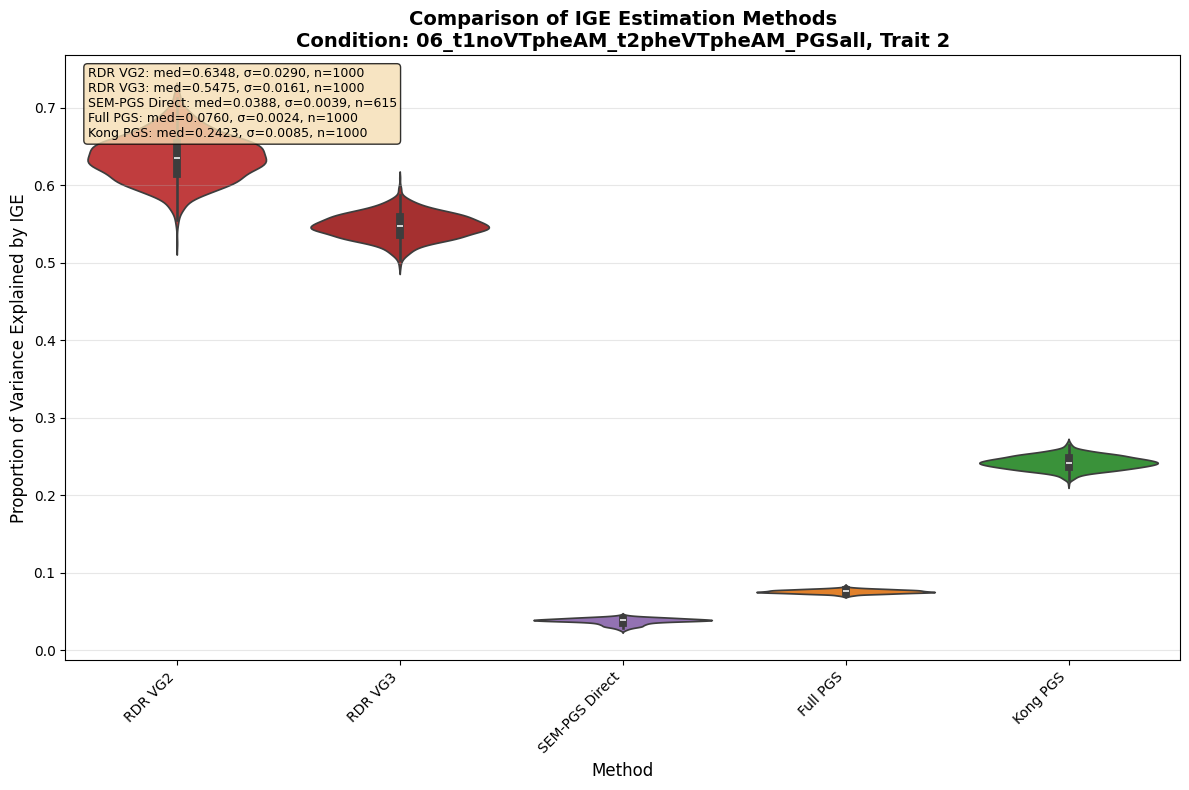

In [16]:
# Condition 6, Trait 2
condition = '06_t1noVTpheAM_t2pheVTpheAM_PGSall'
trait = 2

print(f"=== {condition_names[condition]} - Trait {trait} ===")
results, data_dict = analyze_ige_updated(condition, trait, verbose=True)

if data_dict:
    create_violin_plot(data_dict, condition, trait, save_path=None)
else:
    print("No data available for plotting")

## Condition 7: T1 Social AM Only (PGS All)

=== Condition 7: T1 Social AM only + T2 phe VT + soc AM - Trait 1 ===
SEM-PGS: Loaded 603 rows with 89 columns from individual file
Looking for columns: incremental_r2_PGSm1, incremental_r2_PGSp1
Available columns: ['filename', 'run_number', 'total_r2_PGSo1', 'total_r2_PGSp1', 'total_r2_PGSm1', 'incremental_r2_PGSo1', 'incremental_r2_PGSp1', 'incremental_r2_PGSm1', 'added_predictor_PGSo1', 'added_predictor_PGSp1', 'added_predictor_PGSm1', 'outcome_PGSo1', 'outcome_PGSp1', 'outcome_PGSm1', 'n_samples', 'n_predictors', 'outcome', 'regression_type']

Results for Condition 7: T1 Social AM only + T2 phe VT + soc AM - Trait 1:
  RDR VG2: n=1000, median=-0.0001, std=0.0091
  RDR VG3: n=1000, median=-0.0007, std=0.0232
  SEM-PGS Direct: n=603, median=0.0010, std=0.0005
  Full PGS: n=999, median=0.0000, std=0.0000
  Kong PGS: n=999, median=0.0002, std=0.0002


/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis/compare_ige_methods.py:253: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df_plot, x='Method', y='IGE_Proportion',


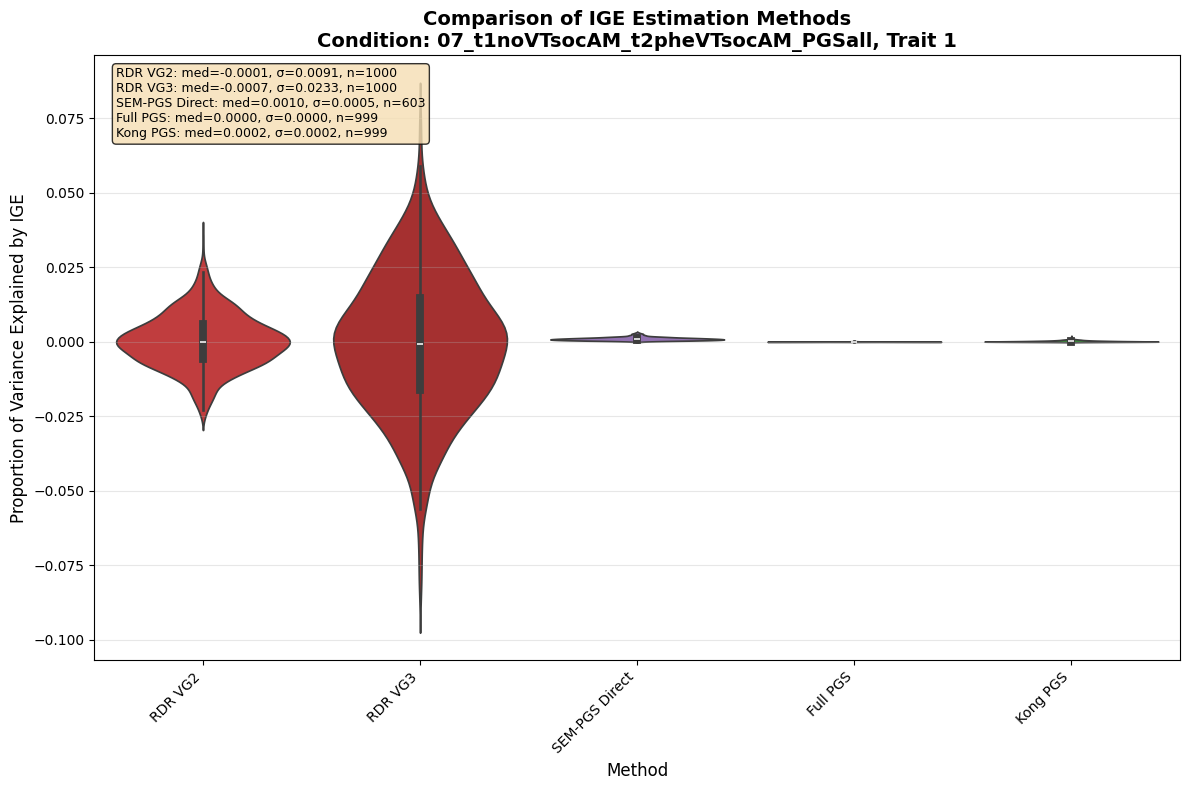

In [18]:
# Condition 7, Trait 1
condition = '07_t1noVTsocAM_t2pheVTsocAM_PGSall'
trait = 1

print(f"=== {condition_names[condition]} - Trait {trait} ===")
results, data_dict = analyze_ige_updated(condition, trait, verbose=True)

if data_dict:
    create_violin_plot(data_dict, condition, trait, save_path=None)
else:
    print("No data available for plotting")

=== Condition 7: T1 Social AM only + T2 phe VT + soc AM - Trait 2 ===
SEM-PGS: Loaded 603 rows with 89 columns from individual file
Looking for columns: incremental_r2_PGSm2, incremental_r2_PGSp2
Available columns: ['filename', 'run_number', 'total_r2_PGSo2', 'total_r2_PGSp2', 'total_r2_PGSm2', 'incremental_r2_PGSo2', 'incremental_r2_PGSp2', 'incremental_r2_PGSm2', 'added_predictor_PGSo2', 'added_predictor_PGSp2', 'added_predictor_PGSm2', 'outcome_PGSo2', 'outcome_PGSp2', 'outcome_PGSm2', 'n_samples', 'n_predictors', 'outcome', 'regression_type']

Results for Condition 7: T1 Social AM only + T2 phe VT + soc AM - Trait 2:
  RDR VG2: n=1000, median=0.3048, std=0.0223
  RDR VG3: n=1000, median=0.4285, std=0.0150
  SEM-PGS Direct: n=603, median=0.0481, std=0.0033
  Full PGS: n=999, median=0.0807, std=0.0027
  Kong PGS: n=999, median=0.1363, std=0.0082


/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis/compare_ige_methods.py:253: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df_plot, x='Method', y='IGE_Proportion',


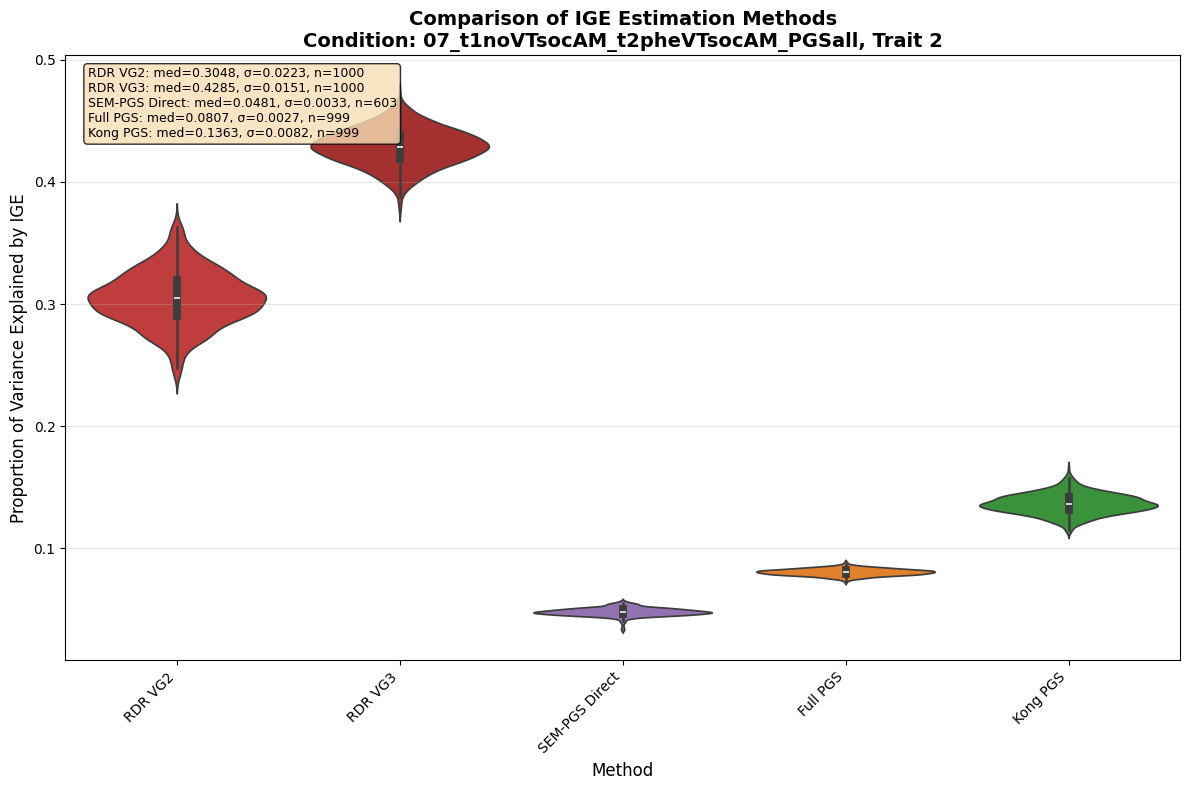

In [19]:
# Condition 7, Trait 2
condition = '07_t1noVTsocAM_t2pheVTsocAM_PGSall'
trait = 2

print(f"=== {condition_names[condition]} - Trait {trait} ===")
results, data_dict = analyze_ige_updated(condition, trait, verbose=True)

if data_dict:
    create_violin_plot(data_dict, condition, trait, save_path=None)
else:
    print("No data available for plotting")

## Condition 8: T1 Genetic AM Only (PGS All)

=== Condition 8: T1 Genetic AM only + T2 phe VT + gen AM - Trait 1 ===
SEM-PGS: Loaded 693 rows with 89 columns from individual file
Looking for columns: incremental_r2_PGSm1, incremental_r2_PGSp1
Available columns: ['filename', 'run_number', 'total_r2_PGSo1', 'total_r2_PGSp1', 'total_r2_PGSm1', 'incremental_r2_PGSo1', 'incremental_r2_PGSp1', 'incremental_r2_PGSm1', 'added_predictor_PGSo1', 'added_predictor_PGSp1', 'added_predictor_PGSm1', 'outcome_PGSo1', 'outcome_PGSp1', 'outcome_PGSm1', 'n_samples', 'n_predictors', 'outcome', 'regression_type']

Results for Condition 8: T1 Genetic AM only + T2 phe VT + gen AM - Trait 1:
  RDR VG2: n=1000, median=0.1184, std=0.0156
  RDR VG3: n=1000, median=0.2852, std=0.0202
  SEM-PGS Direct: n=693, median=0.0012, std=0.0006
  Full PGS: n=1000, median=0.0000, std=0.0000
  Kong PGS: n=1000, median=0.0252, std=0.0034


/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis/compare_ige_methods.py:253: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df_plot, x='Method', y='IGE_Proportion',


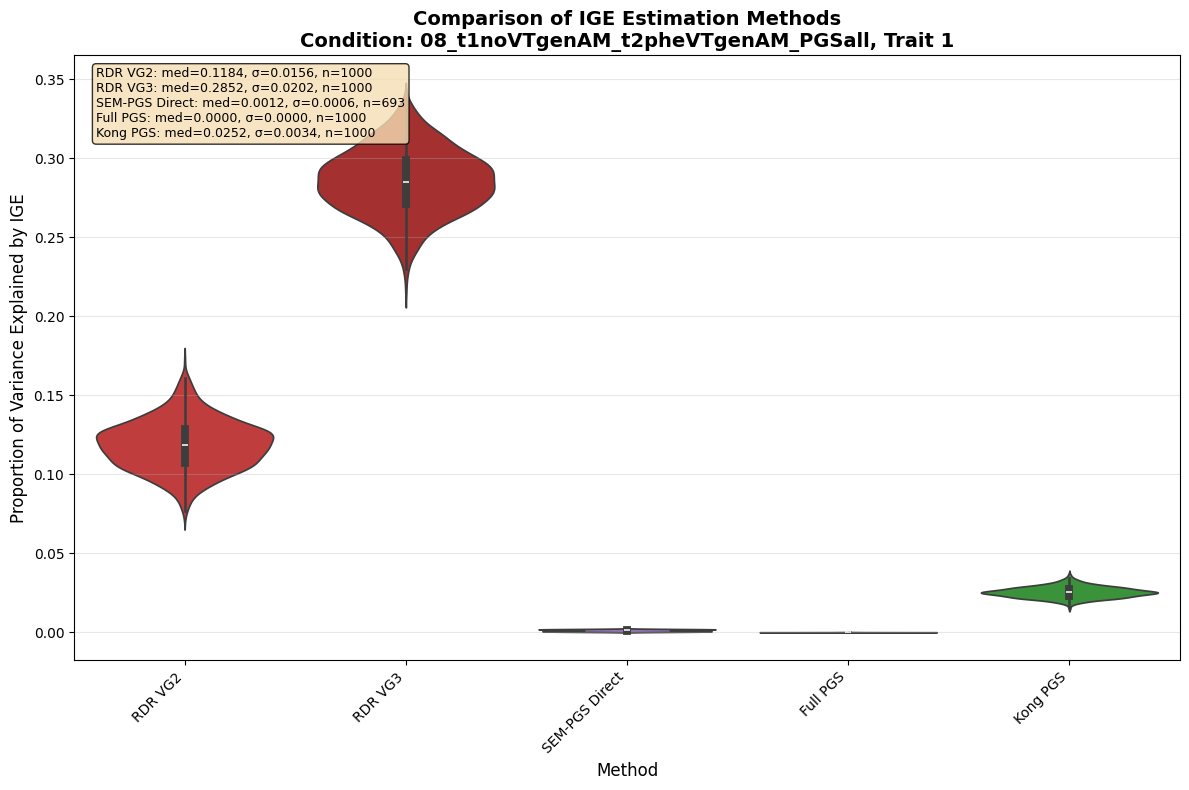

In [20]:
# Condition 8, Trait 1
condition = '08_t1noVTgenAM_t2pheVTgenAM_PGSall'
trait = 1

print(f"=== {condition_names[condition]} - Trait {trait} ===")
results, data_dict = analyze_ige_updated(condition, trait, verbose=True)

if data_dict:
    create_violin_plot(data_dict, condition, trait, save_path=None)
else:
    print("No data available for plotting")

=== Condition 8: T1 Genetic AM only + T2 phe VT + gen AM - Trait 2 ===
SEM-PGS: Loaded 693 rows with 89 columns from individual file
Looking for columns: incremental_r2_PGSm2, incremental_r2_PGSp2
Available columns: ['filename', 'run_number', 'total_r2_PGSo2', 'total_r2_PGSp2', 'total_r2_PGSm2', 'incremental_r2_PGSo2', 'incremental_r2_PGSp2', 'incremental_r2_PGSm2', 'added_predictor_PGSo2', 'added_predictor_PGSp2', 'added_predictor_PGSm2', 'outcome_PGSo2', 'outcome_PGSp2', 'outcome_PGSm2', 'n_samples', 'n_predictors', 'outcome', 'regression_type']

Results for Condition 8: T1 Genetic AM only + T2 phe VT + gen AM - Trait 2:
  RDR VG2: n=1000, median=0.5415, std=0.0268
  RDR VG3: n=1000, median=0.4945, std=0.0159
  SEM-PGS Direct: n=693, median=0.0468, std=0.0064
  Full PGS: n=1000, median=0.0732, std=0.0025
  Kong PGS: n=1000, median=0.1797, std=0.0078


/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis/compare_ige_methods.py:253: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df_plot, x='Method', y='IGE_Proportion',


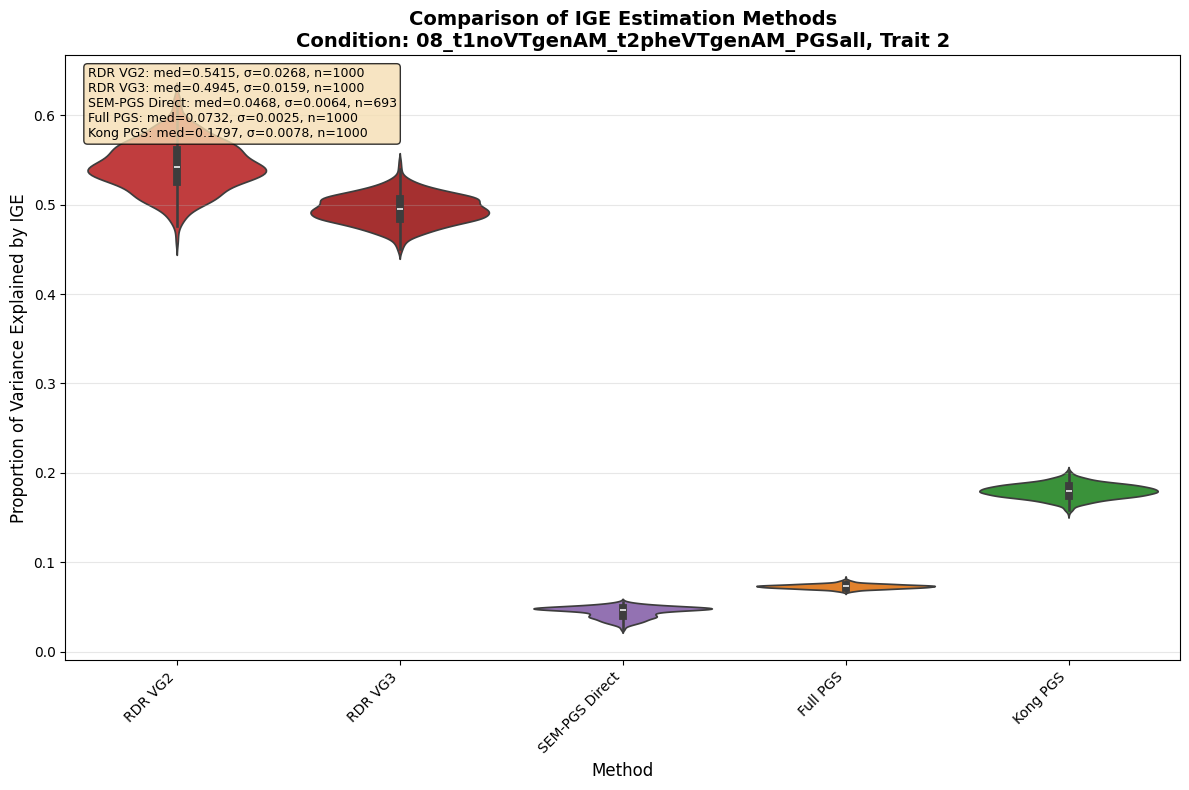

In [21]:
# Condition 8, Trait 2
condition = '08_t1noVTgenAM_t2pheVTgenAM_PGSall'
trait = 2

print(f"=== {condition_names[condition]} - Trait {trait} ===")
results, data_dict = analyze_ige_updated(condition, trait, verbose=True)

if data_dict:
    create_violin_plot(data_dict, condition, trait, save_path=None)
else:
    print("No data available for plotting")

## Summary and Interpretation

The updated analysis now focuses on direct IGE estimates only and includes:

### Method Details:
- **RDR VG2**: Second parameter from relatedness disequilibrium regression
- **RDR VG3**: Third parameter from relatedness disequilibrium regression  
- **SEM-PGS Direct**: Direct genetic nurture effects (phi) only, no latent effects
- **Full PGS**: Incremental R² from adding parental PGS to offspring PGS
- **Kong PGS**: R² from paternal non-transmitted alleles (haplotypic approach)

### Statistical Reporting:
- **Median** values instead of means (more robust to outliers)
- Standard deviations for variability assessment
- Sample sizes for each method

### Interpretation Notes:
- Different conditions represent various combinations of vertical transmission and assortative mating
- Trait-specific patterns may emerge due to different simulation parameters
- Method comparisons reveal strengths and limitations of each IGE estimation approach

In [ ]:
# Example 4: Compare specific methods only
print("Example 4: Comparing only RDR and Full PGS methods")
print("-" * 50)

condition = '06_t1noVTpheAM_t2noVTnoAM_PGSall'
trait = 2

# Load only specific methods
rdr_data = load_rdr_data(condition)
rdr_ige = calculate_rdr_ige_proportions(rdr_data, trait) if rdr_data is not None else None

fullpgs_data = load_pgs_regression_data(condition, trait, 'full_pgs')
fullpgs_ige = calculate_fullpgs_ige_proportions(fullpgs_data, trait) if fullpgs_data is not None else None

# Create comparison
limited_data_dict = {}
if rdr_ige is not None:
    limited_data_dict['RDR'] = rdr_ige
    print(f"RDR: {len(rdr_ige)} obs, mean = {np.mean(rdr_ige):.4f}")

if fullpgs_ige is not None:
    limited_data_dict['Full PGS'] = fullpgs_ige  
    print(f"Full PGS: {len(fullpgs_ige)} obs, mean = {np.mean(fullpgs_ige):.4f}")

if limited_data_dict:
    create_violin_plot(limited_data_dict, condition, trait, save_path=None)

In [ ]:
# Example 5: Summary statistics across all methods
print("\nExample 5: Cross-method summary statistics")
print("-" * 50)

def get_cross_method_summary(conditions, traits):
    """Generate summary statistics across multiple conditions and traits."""
    
    summary_data = []
    
    for condition in conditions:
        for trait in traits:
            results = analyze_ige_methods(condition, trait, verbose=False, show_plot=False)
            
            for method, stats in results.items():
                summary_data.append({
                    'condition': condition,
                    'trait': trait,
                    'method': method,
                    'n_obs': stats['n'],
                    'mean_ige': stats['mean'],
                    'std_ige': stats['std'],
                    'median_ige': stats['median']
                })
    
    return pd.DataFrame(summary_data)

# Generate cross-method summary
summary_df = get_cross_method_summary(
    conditions=['05_t1pheVTnoAM_t2socVTnoAM_PGSall', '06_t1noVTpheAM_t2noVTnoAM_PGSall'],
    traits=[1, 2]
)

print(f"Generated summary with {len(summary_df)} method-condition-trait combinations")
print("\nFirst few rows:")
print(summary_df.head(10))

# Method comparison across conditions
if len(summary_df) > 0:
    print(f"\nMean IGE estimates by method:")
    method_means = summary_df.groupby('method')['mean_ige'].agg(['count', 'mean', 'std']).round(4)
    print(method_means)